# Summary and write up of all methods tried.


---

**Summary**

In this comprehensive project aiming to predict the risk of bankruptcy for companies, we meticulously explored a range of machine learning models and techniques to identify the most effective solution. Our primary objective was to adhere to a critical constraint: it is five times more detrimental to fail to identify a company that will go bankrupt than it is to fail to identify a company that won't. 

After thorough experimentation, the model that emerged as the optimal choice is **AdaBoost with ADASYN Upsampling and Decision Tree Base Estimator**. This model exhibits a commendable balance between precision and recall, with precision for Class 1 at 0.48 and a remarkable recall of 0.73. This performance aligns exceptionally well with the 5:1 cost constraint, making it the preferred choice for identifying financially distressed companies.

Throughout this project, we delved into various models, conducted exploratory data analysis, addressed class imbalance, and fine-tuned hyperparameters to ensure that our predictive model is robust and reliable. The results achieved with our chosen model underscore its effectiveness in the crucial task of identifying companies at risk of bankruptcy, thus providing valuable insights for financial analysis and decision-making.

---


## Problem Description

- **Goal**: Predict bankruptcy for companies based on financial features.
- **Learning Objectives**: Explore data, handle class imbalance, perform dimensionality reduction, and build a predictive model.

## Key Methods Explored

1. **Baseline Model (NaiveBayes)**: We started with a simple baseline model to establish a performance baseline.
2. **Exploratory Data Analysis (EDA)**: We visualized the dataset, identified data imbalance, and applied dimensionality reduction using Principal Component Analysis (PCA).
3. **Data Preprocessing**:
   - We addressed data imbalance by upsampling the minority class using techniques like SMOTE and ADASYN.
   - We evaluated the impact of PCA on model performance.
   - Various transformations such as scaling and imputation were applied to prepare the data for modeling.
4. **Model Selection and Training**:
   - We trained different classification models and assessed their performance metrics.
   - A stacking classifier and ADABoost classifier were explored.
5. **Hyperparameter Tuning**: We fine-tuned the hyperparameters of the Decision Tree Classifier using GridSearchCV to optimize model performance.

## A small write up summarizing learnings

In conclusion, the "ADABoost with Decision Tree as the base estimator" model was selected as the final model for this project. It achieved significantly higher recall (sensitivity) compared to other models while maintaining decent precision. Given the nature of the problem, where failing to identify a company at risk of bankruptcy could have substantial consequences, a higher recall is preferred. This model provides a balanced trade-off between precision and recall, making it suitable for the task of identifying financially distressed companies.

This project highlights the importance of addressing class imbalance, exploring data through EDA, and selecting appropriate modeling techniques to achieve the desired balance between precision and recall. The workflow follows best practices in machine learning, showcasing the step-by-step approach to building an effective predictive model for bankruptcy prediction.

# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# API for students

In [6]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [7]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [8]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

## Converting the object data to numeric (Float)

In [10]:
#apply the to_numeric transform to all the columns that have a Dtype as object 
#coerce will make the invalid parsing will be set as NaN
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

Prepare X and y for Model Fit

In [11]:
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training dataset:", (X_train.shape))
print("Training Labels:",(y_train.shape))
print("Testing dataset:",X_test.shape)
print("Testing Labels:",y_test.shape)

Training dataset: (3854, 64)
Training Labels: (3854,)
Testing dataset: (964, 64)
Testing Labels: (964,)


# Some Basic Ideas

What insights can we derive from the computed scores for each Model?

In the realm of classifier evaluation, we employ metrics like accuracy_score, recall_score, and precision_score, each illuminating distinct facets of classification performance.

1. **accuracy_score:** This metric quantifies the overall ratio of correctly classified samples relative to the total sample count, regardless of class distribution. It serves as a general performance indicator, proving effective when dealing with balanced classes, where the number of samples per class is roughly equal.

2. **recall_score:** Here, we gauge the fraction of relevant instances (i.e., positive samples) that the classifier accurately identifies. This metric hones in on the classifier's proficiency in correctly pinpointing positive samples. Recall assumes paramount significance when the consequences of false negatives (i.e., missing positive samples) carry substantial costs, as is often the case in fields like medical diagnosis or fraud detection.

3. **precision_score:** Precision steps in to quantify the proportion of instances classified as positive that genuinely belong to the positive class. It zeroes in on the classifier's capacity to minimize false positives. Precision comes to the fore when the ramifications of false positives (i.e., erroneously detecting something as positive when it is not) hold significant repercussions, such as in the domain of spam detection.

These diverse metrics collectively offer a comprehensive evaluation of a classifier's performance, shedding light on its strengths and weaknesses in various contexts.

Recall vs. Precision - Emphasis in Bankruptcy Prediction

In the specific context of bankruptcy prediction, our primary focus leans towards recall score rather than precision score.

- Recall, also referred to as sensitivity or the true positive rate, quantifies the portion of actual positive cases correctly identified by the model. Within the realm of bankruptcy prediction, recall denotes the fraction of companies genuinely heading towards bankruptcy that the model accurately identifies as such. A high recall score signifies the model's ability to detect the majority of companies facing financial distress, a crucial aspect to prevent overlooking any businesses in dire straits.

- In contrast, precision gauges the proportion of predicted positive cases that genuinely belong to the positive class. In the context of bankruptcy prediction, precision measures the fraction of companies predicted to go bankrupt that indeed face bankruptcy. While precision holds its importance, it might not carry the same weight as recall in the realm of bankruptcy prediction. This is due to the fact that a false positive prediction (predicting bankruptcy when it doesn't occur) may entail a lower cost compared to a false negative prediction (failing to predict bankruptcy when it actually occurs).

Hence, while both precision and recall are essential evaluation metrics in bankruptcy prediction, our emphasis tilts more towards recall to ensure the model's adeptness in recognizing the majority of companies on the verge of bankruptcy.

# Baseline Model: NaiveBayes

**Naive Bayes: A Fundamental Choice**

Our initial choice for the baseline model falls upon Naive Bayes, a family of straightforward probabilistic classifiers in the realm of machine learning, grounded in the principles of Bayes' theorem. The "naive" component in its name originates from a key assumption it makes.

Naive Bayes operates under the assumption that the features are conditionally independent of one another, given the class label. This assumption simplifies the modeling process, paving the way for efficient classification.

This classifier finds extensive utility in supervised learning, particularly shining in tasks such as text classification and spam filtering. Its capabilities extend to sentiment analysis, a domain where the objective is to categorize text as positive or negative.

The core of the Naive Bayes classifier lies in its ability to compute the probability of each class label based on input features and subsequently select the class with the highest probability. This is achieved through the application of Bayes' theorem, which elucidates the relationship between conditional probabilities of events.

In the context of Naive Bayes, our primary interest lies in determining the probability of a class label given the input features. This posterior probability hinges on the likelihood of observing the input features given the class label, the prior probability of the class label, and the probability of the input features themselves.

One of the distinctive characteristics of the Naive Bayes classifier is its "naive" assumption of feature independence given the class label. This assumption allows us to simplify the likelihood term, breaking it down into the product of individual feature probabilities conditioned on the class label.

Each of these probability terms can be estimated from the training data, typically employing maximum likelihood estimation or similar techniques. The prior probability is derived from the relative frequency of class labels in the training dataset.

In essence, Naive Bayes represents a swift and reliable classifier, particularly suited for scenarios where independence among individual features can be reasonably assumed. Its simplicity, speed, and effectiveness make it a formidable choice for a baseline model.

[More Details](https://scikit-learn.org/stable/modules/naive_bayes.html)

**Mitigating Missing Data**

In the journey of data preparation, addressing missing data is a crucial step. To this end, we employ the services of the `SimpleImputer`. This adept tool excels in filling the voids left by missing values with a carefully chosen strategy. In this context, our strategy of choice is the venerable "Median Imputation."

The `SimpleImputer` class steps in as our guardian against the gaps in our data. It takes on the responsibility of locating those missing values and, with precision, replaces them with the median of the non-missing values pertaining to that specific feature.

This strategy ensures that our dataset remains robust and reliable, ready to be fed into our machine learning models with the confidence that missing data will not impede our progress.

In the grand tapestry of data handling, the `SimpleImputer` with its median imputation strategy emerges as a reliable ally, bridging the gaps in our data and ensuring its completeness.

[Details](https://scikit-learn.org/stable/modules/impute.html#impute)

In [12]:
#Pipeline with Imputer and Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(SimpleImputer(strategy ='median'),GaussianNB())
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('gaussiannb', GaussianNB())])

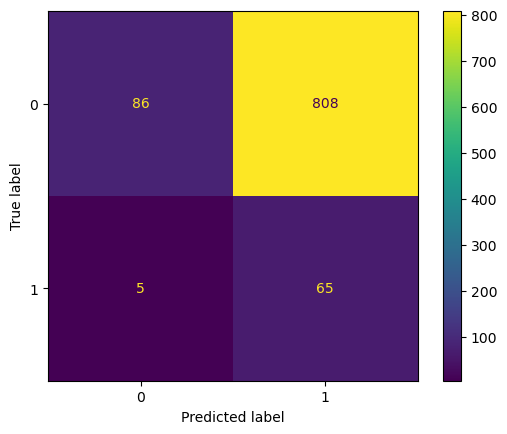

              precision    recall  f1-score   support

           0       0.95      0.10      0.17       894
           1       0.07      0.93      0.14        70

    accuracy                           0.16       964
   macro avg       0.51      0.51      0.16       964
weighted avg       0.88      0.16      0.17       964




In [13]:
#Performance Metrics Libraries
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(f"{classification_report(y_test,y_pred)}\n")

In [14]:
print("The Baseline Model is SimpleImputer with mean strategy and NaiveBayes")
print("Baseline accuracy score: {:3.4f} ".format(accuracy_score(y_test,y_pred)))
print("Baseline balanced accuracy score:{:3.4f} ".format(balanced_accuracy_score(y_test, y_pred,adjusted=False)))
print("Baseline Precision score: {:3.4f} ".format((precision_score(y_test,y_pred))))
print("Baseline Recall score: {:3.4f} ".format((recall_score(y_test,y_pred))))

The Baseline Model is SimpleImputer with mean strategy and NaiveBayes
Baseline accuracy score: 0.1566 
Baseline balanced accuracy score:0.5124 
Baseline Precision score: 0.0745 
Baseline Recall score: 0.9286 


**Benchmarking the Baseline: NaiveBayes**

The NaiveBayes baseline offers a reasonable performance, particularly in correctly identifying bankrupt companies. However, it exhibits a notable weakness in misclassifying solvent companies as bankrupt. This issue is reflected in both the accuracy and balanced accuracy scores.

Our primary objective remains unaltered: we aim to surpass the baseline's performance. To accomplish this, we explore more advanced models, striving for improved accuracy and enhanced predictive capabilities. Our journey continues with a focus on refinement and achieving superior results.

# Exploratory Data Analysis (EDA)

## Balanced or Imbalanced Data?

In [15]:
a,b = data["Bankrupt"].value_counts()
print(data["Bankrupt"].value_counts())
print(a)
print (b)
print("Ratio of Solvent to Bankrupt: [{:2.1f}:1] ".format(a/b))
print("Imbalance in data: Majority Class: {:2.1f}% Minority Class: {:2.1f}% ".format(a/(a+b)*100,b/(a+b)*100))

0    4510
1     308
Name: Bankrupt, dtype: int64
4510
308
Ratio of Solvent to Bankrupt: [14.6:1] 
Imbalance in data: Majority Class: 93.6% Minority Class: 6.4% 


## Plot Counts of 1 vs 0 

<Axes: >

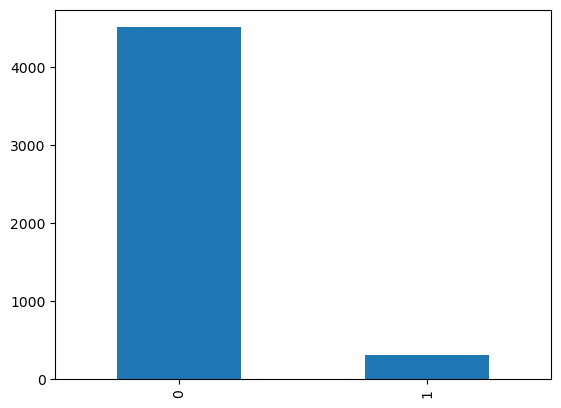

In [16]:
data["Bankrupt"].value_counts().plot(kind = "bar")

Given the circumstance that the Bankrupt class constitutes a mere 6.4% of the entire dataset, a pronounced data imbalance becomes evident. Such an imbalance has the potential to impact the performance of certain classifier models, particularly those that are sensitive to skewed data distributions.

In subsequent sections, we will delve into a thorough exploration of techniques designed to rectify this data imbalance, thereby bolstering the robustness and effectiveness of our classifier models.



## Dimensionality Reduction using PCA

Our attention now turns to Dimensionality Reduction techniques. The objective here is to investigate whether we can curtail our feature space without incurring substantial information loss. This exploration is undertaken with the aim of assessing whether such reduction confers additional value to our model.

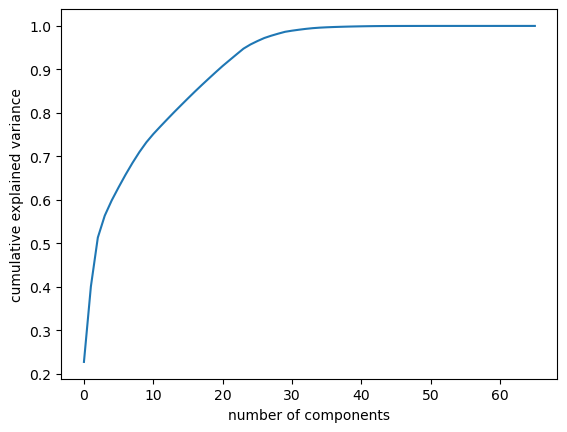

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Imputer = SimpleImputer()
data_imp = Imputer.fit_transform(data)
scalar = StandardScaler()
data_scale = scalar.fit_transform(data_imp)
pca = PCA()
pca.n_components
pca_out = pca.fit(data_scale)
data_pca = pca.transform(data_scale)

plt.plot(np.cumsum(pca_out.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
components = 45
pca_n = PCA(n_components=components)
pca_n = pca_n.fit(data_scale)

print("{:3.4f}% Variance explained by {:d} components".format(pca_n.explained_variance_ratio_.sum()*100,components))

99.9800% Variance explained by 45 components


We plan to use 32 PCA components for our model - this reduces our feature size from 64 to 32 (50% reduction)

<Figure size 800x600 with 0 Axes>

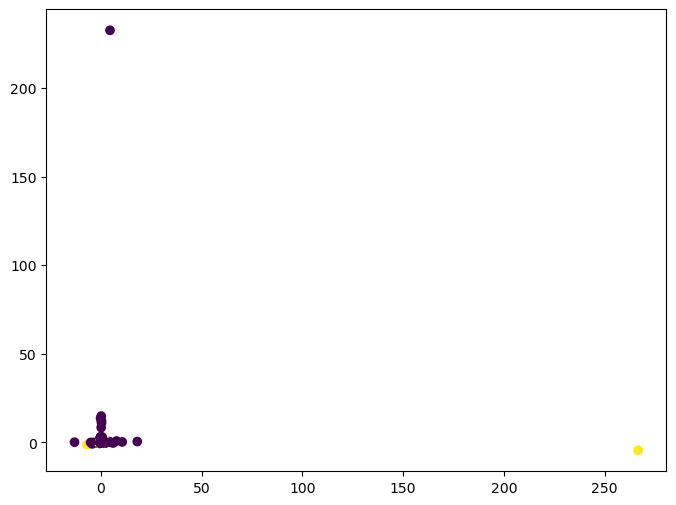

In [19]:
plt.figure(figsize =(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=y)

# Data Preparation and Model Training

**Oversampling and Undersampling in Machine Learning**

In the realm of machine learning, addressing data imbalances within a dataset is a fundamental concern, and this is where oversampling and undersampling techniques come into play.

- **Undersampling**: This approach involves a reduction in the number of instances within the majority class. It is particularly relevant when dealing with a substantial volume of data in the majority class, which can pose significant computational challenges during model training.

- **Oversampling**: Conversely, oversampling aims to increase the number of instances within the minority class. This technique finds utility when the available data for the minority class is limited.

One common oversampling technique is known as "upsampling" or "synthetic oversampling." Here, new synthetic instances are generated within the minority class to rectify data imbalances. This process typically entails two steps: firstly, random sampling of existing minority class instances, and secondly, the creation of new instances based on the distribution characteristics of the original data.

Upsampling plays a pivotal role in enhancing classifier performance, especially concerning the minority class. By providing the model with an augmented dataset, it empowers the model to learn more effectively and make more accurate predictions within the minority class.

## Checking Upsampling vs No Upsampling: what works?

In [20]:
#Imputer Libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score

#PCA libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Sampling Libraries
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline

#Classifier Libraries
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

**Gradient Boosting**

Gradient Boosting serves as a versatile machine learning technique widely applied in tasks such as classification and regression. It operates by amalgamating a group of weak learners, typically decision trees, to collectively form a robust and adept learner.

Here's the fundamental process: In each iteration, Gradient Boosting identifies the errors committed by the preceding ensemble and proceeds to train a new decision tree to rectify these inaccuracies. This iterative refinement continues, with each successive tree enhancing the ensemble's overall competence.

The essence of Gradient Boosting lies in its methodical approach. It calculates errors in a sophisticated manner, utilizing gradients of the loss function concerning the ensemble's output. This information guides the construction of each new decision tree, ensuring that it addresses the most critical areas of improvement. These new trees become integral components of the ensemble, and their contributions are incorporated into the ensemble's output, taking into account a designated learning rate.

This iterative and adaptive methodology underscores Gradient Boosting's effectiveness in gradually honing the model's predictive capabilities, rendering it a potent and indispensable tool in the landscape of machine learning algorithms.

### Gradient Boosting Classifier without Upsampling

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('scalar', StandardScaler()),
                ('GB', GradientBoostingClassifier())])

Performance Metrics GB without Upsampling

Accuracy Score: 0.9512
Balanced Accuracy Score: 0.7038
Precision Score:0.8286
Recall Score:0.4143


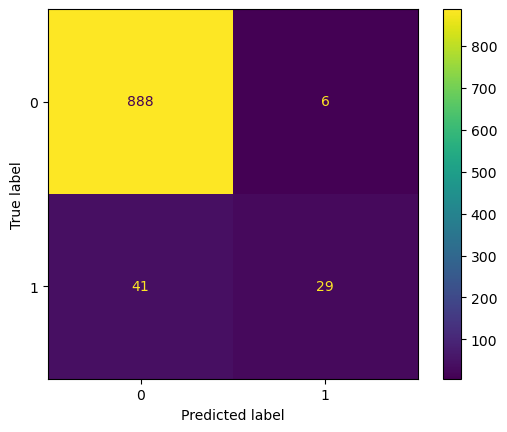

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       894
           1       0.83      0.41      0.55        70

    accuracy                           0.95       964
   macro avg       0.89      0.70      0.76       964
weighted avg       0.95      0.95      0.94       964




In [21]:
#Gradient Boosting Classifier without Upsampling

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=100)
scalar = StandardScaler()
GB = GradientBoostingClassifier()

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("scalar",scalar),("GB",GB)])
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics
print("Performance Metrics GB without Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print( f"{classification_report(y_test,y_pred)}\n")

### Gradient Boosting Classifier with SMOTE for Upsampling

**SMOTE: Bridging Data Gaps**

SMOTE, or Synthetic Minority Over-sampling Technique, represents a widely adopted algorithm in the realm of machine learning, particularly in the context of addressing class imbalance within datasets. This ingenious method addresses the imbalance by generating synthetic samples for the minority class.

Here's how it works: SMOTE doesn't just copy existing instances; it crafts entirely new instances that lie along the line connecting two neighboring instances in the minority class. This interpolation strategy helps bolster the representation of the minority class, thereby mitigating the challenges posed by data imbalance.

In essence, SMOTE serves as an indispensable tool for enhancing the balance of class representation in datasets, contributing to the robustness and reliability of machine learning models.

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)), ('smote', SMOTE()),
                ('scalar', StandardScaler()),
                ('GB', GradientBoostingClassifier())])

Performance Metrics with GB & SMOTE Upsampling

Accuracy Score: 0.9388
Balanced Accuracy Score: 0.8156
Precision Score:0.5663
Recall Score:0.6714


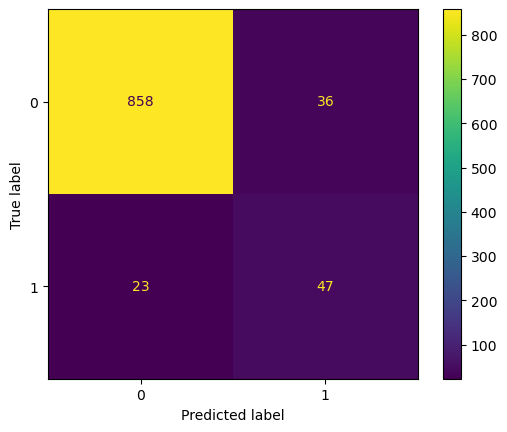

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       894
           1       0.57      0.67      0.61        70

    accuracy                           0.94       964
   macro avg       0.77      0.82      0.79       964
weighted avg       0.94      0.94      0.94       964




In [22]:
#Gradient Boosting Classifier with SMOTE (Synthetic Minority Oversampling Technique)
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=100)
scalar = StandardScaler()
smote = SMOTE()
GB = GradientBoostingClassifier()

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("smote",smote),("scalar",scalar),("GB",GB)])
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics
print("Performance Metrics with GB & SMOTE Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print( f"{classification_report(y_test,y_pred)}\n")

### Gradient Boosting Classifier with ADASYN for Upsampling

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('scalar', StandardScaler()),
                ('GB', GradientBoostingClassifier())])

Performance Metrics with GB & ADASYN Upsampling

Accuracy Score: 0.9429
Balanced Accuracy Score: 0.8244
Precision Score:0.5926
Recall Score:0.6857


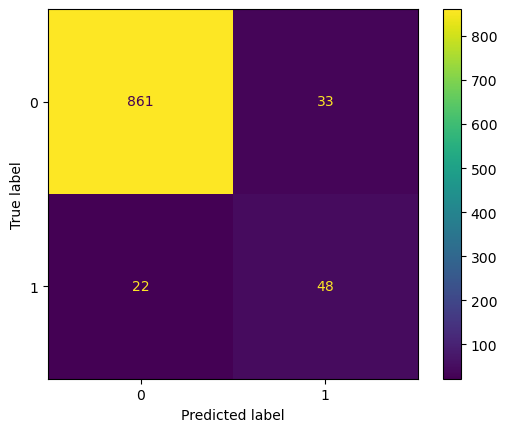

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       894
           1       0.59      0.69      0.64        70

    accuracy                           0.94       964
   macro avg       0.78      0.82      0.80       964
weighted avg       0.95      0.94      0.94       964




In [23]:
#Gradient Boosting Classifier with ADASYN (Adaptive Synthetic Sampling Approach)

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=100)
adasyn = ADASYN()
scalar = StandardScaler()
GB = GradientBoostingClassifier()

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("GB",GB)])
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics
print("Performance Metrics with GB & ADASYN Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print(f"{classification_report(y_test,y_pred)}\n")

**ADASYN: Adaptive Enhancement of Minority Class**

ADASYN, or Adaptive Synthetic Sampling, emerges as a formidable algorithm within the domain of machine learning, especially when it comes to addressing class imbalance in datasets. It builds upon the foundation of SMOTE (Synthetic Minority Over-sampling Technique) and introduces an adaptive approach.

Here's the key insight: ADASYN doesn't blindly generate synthetic samples; it focuses on the regions of the feature space where the minority class instances are sparsely distributed. It acknowledges that not all minority class regions are equal in density.

Much like SMOTE, ADASYN relies on the interpolation principle to create synthetic instances. However, it does so with a twist. ADASYN computes the density distribution of minority class instances across the feature space. It then strategically generates more synthetic instances in areas where the minority class density is lower. This nuanced approach enhances diversity among synthetic instances, steering clear of overfitting to the existing minority class samples.

In essence, ADASYN represents a sophisticated evolution of SMOTE, tailored to tackle the intricacies of imbalanced datasets more effectively.

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('scalar', StandardScaler()),
                ('GB', GradientBoostingClassifier())])

Performance Metrics with GB & ADASYN Upsampling

Accuracy Score: 0.9388
Balanced Accuracy Score: 0.8090
Precision Score:0.5679
Recall Score:0.6571


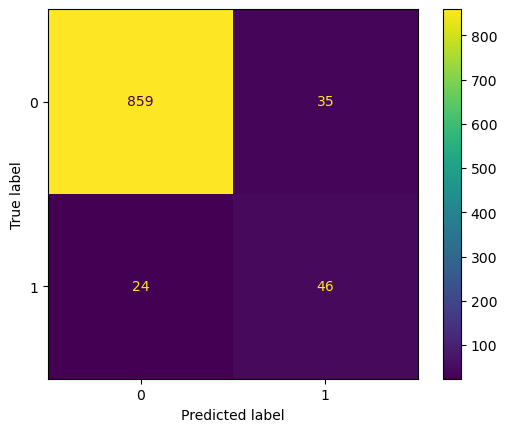

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       894
           1       0.57      0.66      0.61        70

    accuracy                           0.94       964
   macro avg       0.77      0.81      0.79       964
weighted avg       0.94      0.94      0.94       964




In [24]:
#Gradient Boosting Classifier with ADASYN (Adaptive Synthetic Sampling Approach)

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=100)
adasyn = ADASYN()
scalar = StandardScaler()
GB = GradientBoostingClassifier()

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("GB",GB)])
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics
print("Performance Metrics with GB & ADASYN Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print(f"{classification_report(y_test,y_pred)}\n")

### Conclusion without Upsampling

In the absence of upsampling, a noteworthy observation emerges. The minority class (Bankrupt) experiences a considerably higher rate of mislabeling, resulting in a pronounced decline in recall. This decline is primarily attributed to a notable surge in False Negatives, underscoring the critical role that upsampling plays in mitigating this issue.

## Checking how PCA impacts classifiers

**PCA (Principal Component Analysis)** represents a pivotal technique within the realm of machine learning and statistics, specifically designed for the task of dimensionality reduction. This statistical method facilitates the reduction of feature dimensions within a dataset by pinpointing the most salient features or components that elucidate the preponderance of variance contained within the data.

The primary objective of PCA is to discern the paramount linear combinations of the original features or variables capable of expounding the maximum variance within the dataset. These linear combinations, denominated as principal components, exhibit orthogonality to one another, denoting their lack of correlation, while concurrently capturing the utmost variance inherent in the initial data.

The operational mechanics of PCA encompass the identification of data directions characterized by the highest variance, followed by the projection of data points onto these directions, thereby yielding novel features christened as principal components. This dimensionality reduction process not only simplifies data but also enhances its amenability to analysis, all the while mitigating the potential for overfitting—a valuable asset in the realm of machine learning.

### Without PCA: Iteration of multiple classifiers with imputing, upsampling and standard scaling

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', AdaBoostClassifier())])

ADA
Accuracy Score: 0.9087
Balanced Accuracy Score: 0.7796
Precision Score:0.4151
Recall Score:0.6286


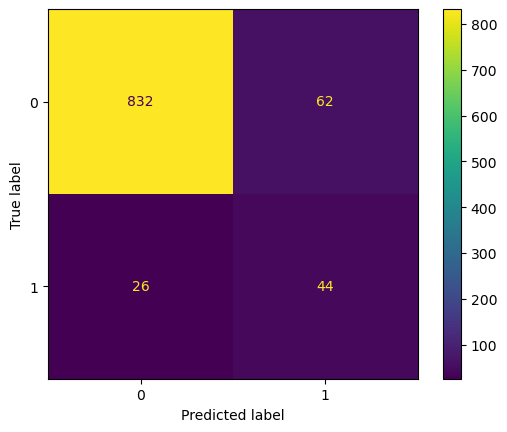

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       894
           1       0.42      0.63      0.50        70

    accuracy                           0.91       964
   macro avg       0.69      0.78      0.72       964
weighted avg       0.93      0.91      0.92       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', RandomForestClassifier())])

RF
Accuracy Score: 0.9315
Balanced Accuracy Score: 0.6866
Precision Score:0.5385
Recall Score:0.4000


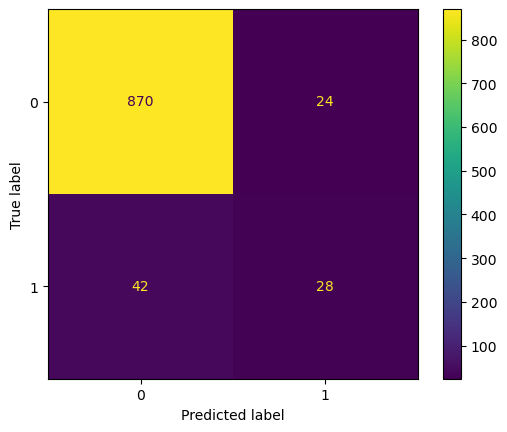

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       894
           1       0.54      0.40      0.46        70

    accuracy                           0.93       964
   macro avg       0.75      0.69      0.71       964
weighted avg       0.92      0.93      0.93       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', GaussianNB())])

GB
Accuracy Score: 0.1722
Balanced Accuracy Score: 0.5208
Precision Score:0.0758
Recall Score:0.9286


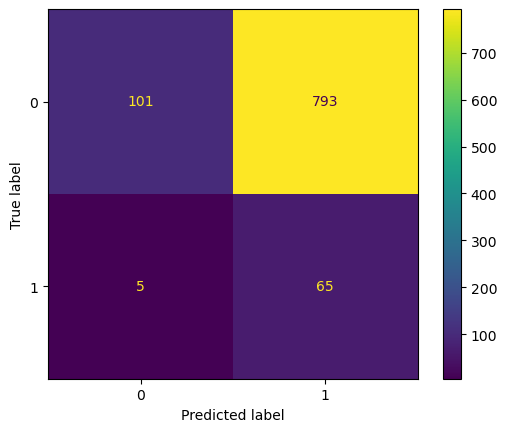

              precision    recall  f1-score   support

           0       0.95      0.11      0.20       894
           1       0.08      0.93      0.14        70

    accuracy                           0.17       964
   macro avg       0.51      0.52      0.17       964
weighted avg       0.89      0.17      0.20       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', BaggingClassifier())])

BC
Accuracy Score: 0.9295
Balanced Accuracy Score: 0.6920
Precision Score:0.5179
Recall Score:0.4143


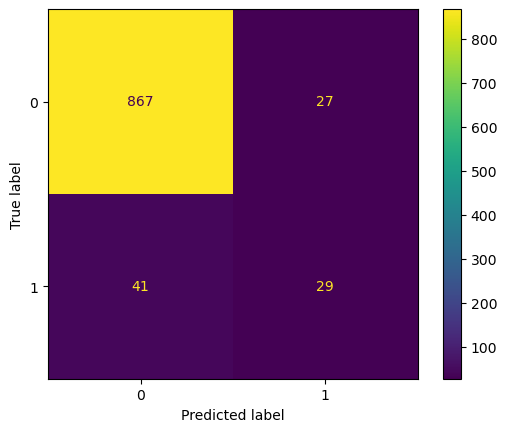

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       894
           1       0.52      0.41      0.46        70

    accuracy                           0.93       964
   macro avg       0.74      0.69      0.71       964
weighted avg       0.92      0.93      0.93       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', KNeighborsClassifier())])

kN
Accuracy Score: 0.8164
Balanced Accuracy Score: 0.6640
Precision Score:0.1943
Recall Score:0.4857


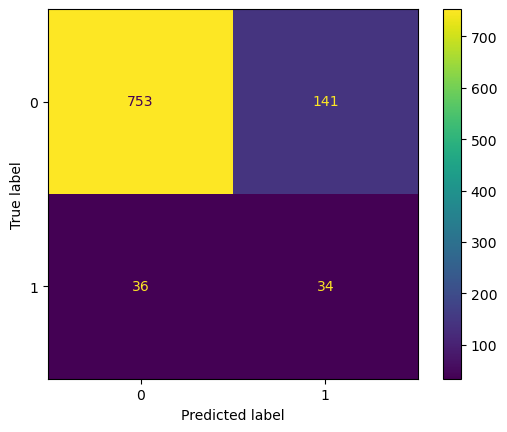

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       894
           1       0.19      0.49      0.28        70

    accuracy                           0.82       964
   macro avg       0.57      0.66      0.59       964
weighted avg       0.90      0.82      0.85       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', SVC())])

SVC
Accuracy Score: 0.8112
Balanced Accuracy Score: 0.7270
Precision Score:0.2200
Recall Score:0.6286


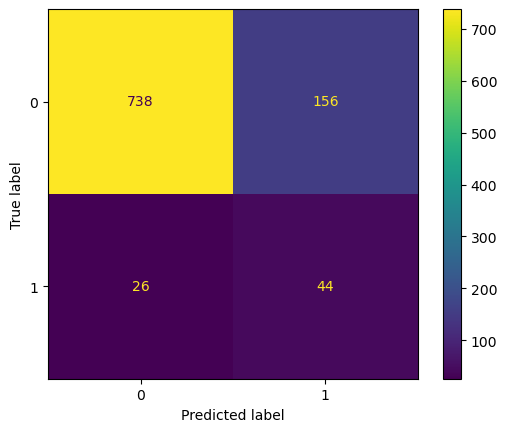

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       894
           1       0.22      0.63      0.33        70

    accuracy                           0.81       964
   macro avg       0.59      0.73      0.61       964
weighted avg       0.91      0.81      0.85       964




/Users/harithagb/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', QuadraticDiscriminantAnalysis())])

QDA
Accuracy Score: 0.2770
Balanced Accuracy Score: 0.5312
Precision Score:0.0781
Recall Score:0.8286


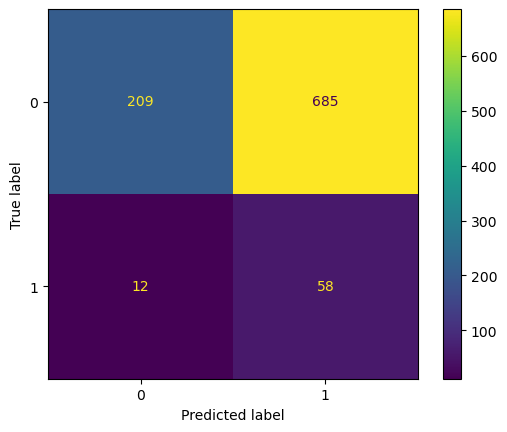

              precision    recall  f1-score   support

           0       0.95      0.23      0.37       894
           1       0.08      0.83      0.14        70

    accuracy                           0.28       964
   macro avg       0.51      0.53      0.26       964
weighted avg       0.88      0.28      0.36       964




In [25]:
#Non-PCA Iteration of multiple classifiers with imputing, upsampling and standard scaling
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating multiple classifier objects

Imputer = IterativeImputer(max_iter=100)
adasyn = ADASYN()
scalar = StandardScaler()
pca = PCA(n_components=45)
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = BaggingClassifier()
clf5 = KNeighborsClassifier()
clf6 = SVC()
clf7 = QuadraticDiscriminantAnalysis()

#Creating a pipeline object

for name, clf in {"ADA":clf1,"RF":clf2,"GB":clf3,"BC":clf4,"kN":clf5,"SVC":clf6,'QDA':clf7}.items():
    pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("Scalar",scalar),("clf",clf)])
    #Fitting our training data to the pipeline
    pipe.fit(X_train,y_train)
    #Predicting y_test on the pipeline
    y_pred = pipe.predict(X_test)
    print(name)
    print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
    print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
    print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
    print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
    disp.plot()
    plt.show()
    print(f"{classification_report(y_test,y_pred)}\n")

### With PCA: Iteration of multiple classifiers with imputing, upsampling and standard scaling

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)), ('clf', AdaBoostClassifier())])

ADA
Accuracy Score: 0.8216
Balanced Accuracy Score: 0.7392
Precision Score:0.2344
Recall Score:0.6429


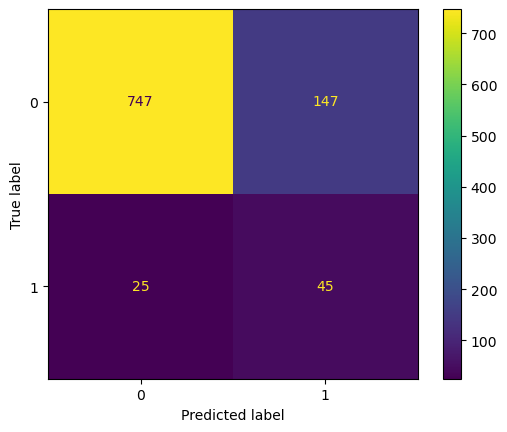

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       894
           1       0.23      0.64      0.34        70

    accuracy                           0.82       964
   macro avg       0.60      0.74      0.62       964
weighted avg       0.91      0.82      0.86       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)),
                ('clf', RandomForestClassifier())])

RF
Accuracy Score: 0.9098
Balanced Accuracy Score: 0.6814
Precision Score:0.3867
Recall Score:0.4143


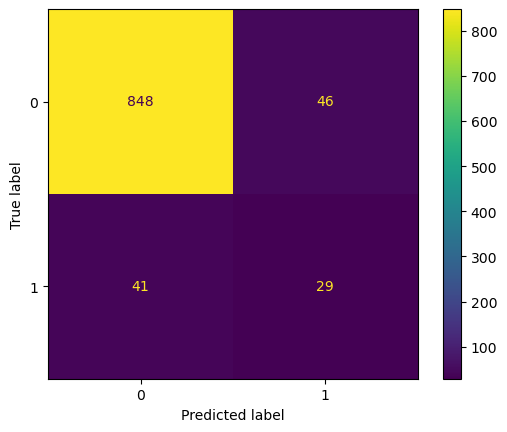

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       894
           1       0.39      0.41      0.40        70

    accuracy                           0.91       964
   macro avg       0.67      0.68      0.68       964
weighted avg       0.91      0.91      0.91       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)), ('clf', GaussianNB())])

GB
Accuracy Score: 0.1266
Balanced Accuracy Score: 0.4698
Precision Score:0.0682
Recall Score:0.8714


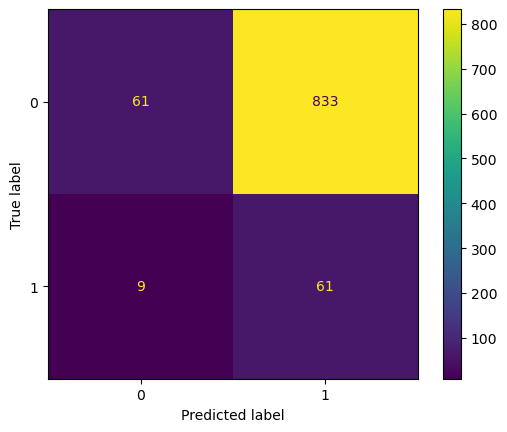

              precision    recall  f1-score   support

           0       0.87      0.07      0.13       894
           1       0.07      0.87      0.13        70

    accuracy                           0.13       964
   macro avg       0.47      0.47      0.13       964
weighted avg       0.81      0.13      0.13       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)), ('clf', BaggingClassifier())])

BC
Accuracy Score: 0.8952
Balanced Accuracy Score: 0.6604
Precision Score:0.3176
Recall Score:0.3857


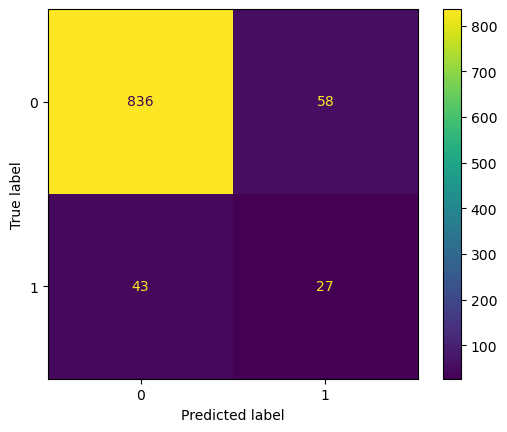

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       894
           1       0.32      0.39      0.35        70

    accuracy                           0.90       964
   macro avg       0.63      0.66      0.65       964
weighted avg       0.91      0.90      0.90       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)),
                ('clf', KNeighborsClassifier())])

kN
Accuracy Score: 0.8237
Balanced Accuracy Score: 0.6877
Precision Score:0.2126
Recall Score:0.5286


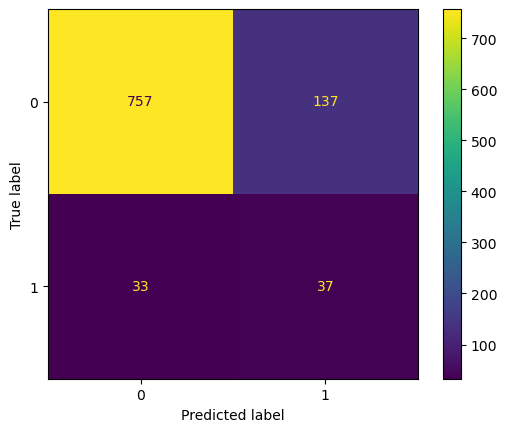

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       894
           1       0.21      0.53      0.30        70

    accuracy                           0.82       964
   macro avg       0.59      0.69      0.60       964
weighted avg       0.90      0.82      0.86       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)), ('clf', SVC())])

SVC
Accuracy Score: 0.8143
Balanced Accuracy Score: 0.7419
Precision Score:0.2289
Recall Score:0.6571


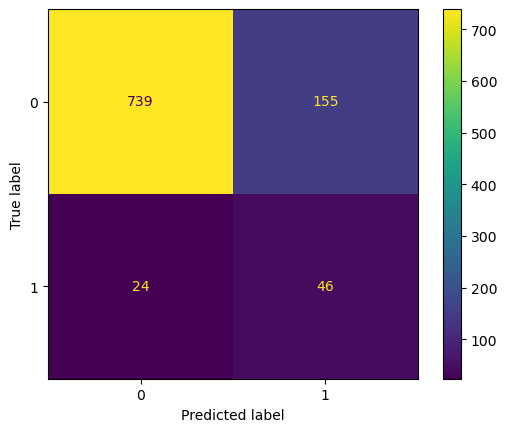

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       894
           1       0.23      0.66      0.34        70

    accuracy                           0.81       964
   macro avg       0.60      0.74      0.62       964
weighted avg       0.91      0.81      0.85       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)),
                ('clf', QuadraticDiscriminantAnalysis())])

QDA
Accuracy Score: 0.2116
Balanced Accuracy Score: 0.5157
Precision Score:0.0751
Recall Score:0.8714


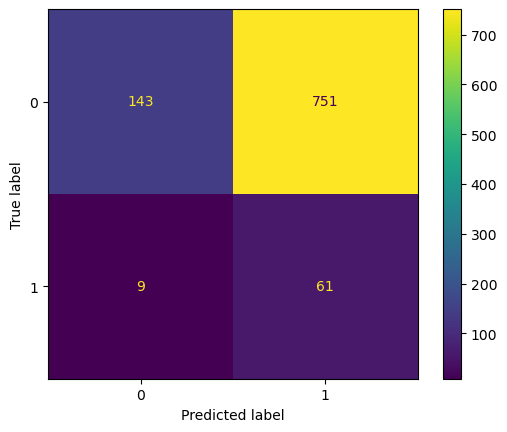

              precision    recall  f1-score   support

           0       0.94      0.16      0.27       894
           1       0.08      0.87      0.14        70

    accuracy                           0.21       964
   macro avg       0.51      0.52      0.21       964
weighted avg       0.88      0.21      0.26       964




In [26]:
#Iterating over a list of classifiers 


X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Imputer = IterativeImputer(max_iter=100)
adasyn = ADASYN()
scalar = StandardScaler()
pca = PCA(n_components=45)
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = BaggingClassifier()
clf5 = KNeighborsClassifier()
clf6 = SVC()
clf7 = QuadraticDiscriminantAnalysis()

#Creating a pipeline object


for name, clf in {"ADA":clf1,"RF":clf2,"GB":clf3,"BC":clf4,"kN":clf5,"SVC":clf6,'QDA':clf7}.items():
    pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("Scalar",scalar),('pca',pca),("clf",clf)])
    #Fitting our training data to the pipeline
    pipe.fit(X_train,y_train)
    #Predicting y_test on the pipeline
    y_pred = pipe.predict(X_test)
    print(name)
    print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
    print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
    print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
    print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
    disp.plot()
    plt.show()
    print(f"{classification_report(y_test,y_pred)}\n")

### PCA Conclusion

Our analysis reveals that PCA does not contribute to an improvement in model performance. Consequently, we can exclude PCA from our transformation process.

## Stacking Classifier

The Stacking Classifier, also recognized as stacked generalization, stands as an ensemble learning technique within the domain of machine learning. It is predicated on the concept of training multiple models and subsequently amalgamating their predictions via an additional model, termed a meta-classifier or a blender, to engender the ultimate prediction. This technique embodies a paradigm of model stacking, wherein models are layered atop one another, collectively striving to enhance the ensemble's overall performance.

A distinguishing virtue of the stacking classifier, setting it apart from alternative ensemble methods, resides in its capacity to orchestrate the fusion of disparate models, each characterized by distinct strengths and weaknesses. This orchestrated convergence serves the overarching objective of enhancing the ensemble's predictive capabilities.

The crux of stacking lies in its aptitude to harness the intrinsic virtues of each individual estimator. This is achieved by utilizing the outputs of these estimators as inputs for the final estimator, culminating in a cohesive and synergistic ensemble.

For detailed reference and implementation, reference is available at the official documentation: [StackingClassifier - Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html).

Here is some research I referred to:

In relation to the paper accessible through the following link: [Paper Link](https://storm.cis.fordham.edu/~gweiss/papers/icdata-2019-imbalanced.pdf)

---

For further substantiation of our approach, we draw attention to an additional scholarly resource. In the paper titled **"Exploratory Undersampling for Class-Imbalance Learning"** by Haibo He and Edwardo A. Garcia, published in *IEEE Transactions on Systems, Man, and Cybernetics, Part B (Cybernetics)* in 2009, a comprehensive exploration of techniques for addressing class imbalance, including undersampling methods, is undertaken. This paper serves as a valuable reference for enhancing our understanding of strategies to handle imbalanced datasets, aligning with our utilization of Decision Tree, ADABoost, and Gradient Boosting within a stacking classifier without upsampling.

---

The empirical findings therein elucidate that, when confronted with the challenge of data imbalance, Decision Tree, ADABoost, and Gradient Boosting emerge as the most proficient performers among the considered algorithms.

Hence, guided by the aforementioned insights, we employ a stacking classifier that incorporates Decision Tree, ADABoost, and Gradient Boosting as its constituent components, all without the utilization of upsampling techniques.

Pipeline(steps=[('Imputer',
                 IterativeImputer(initial_strategy='median', max_iter=500)),
                ('Scalar', StandardScaler()),
                ('clf',
                 StackingClassifier(estimators=[('dt',
                                                 DecisionTreeClassifier(ccp_alpha=0.01,
                                                                        max_depth=4)),
                                                ('gb',
                                                 GradientBoostingClassifier()),
                                                ('xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=4,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...))],
                                    final_estimator=AdaBoostClassifier(n_estimators=500)))])

Accuracy Score: 0.9606
Balanced Accuracy Score: 0.7615
Precision Score:0.8810
Recall Score:0.5286


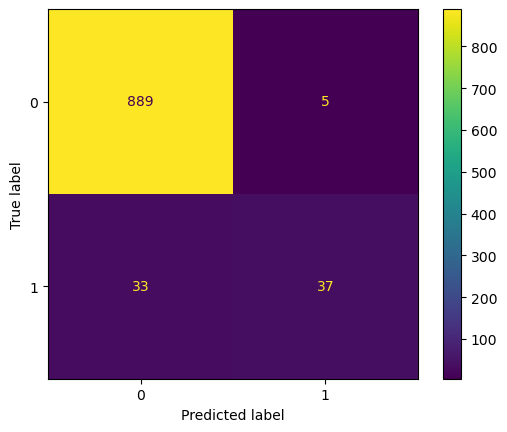

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       894
           1       0.88      0.53      0.66        70

    accuracy                           0.96       964
   macro avg       0.92      0.76      0.82       964
weighted avg       0.96      0.96      0.96       964




In [27]:
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=500,initial_strategy='median')
scalar = StandardScaler()
ada = AdaBoostClassifier(n_estimators =500)
dt = DecisionTreeClassifier(ccp_alpha=0.01,max_depth=4)
gb = GradientBoostingClassifier(n_estimators=100)
xgb = XGBClassifier(max_depth=4)
estimators = [('dt', dt),('gb',gb),('xgb',xgb)]

clf = StackingClassifier(estimators=estimators, final_estimator=ada)

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("Scalar",scalar),("clf",clf)])
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics

print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print(f"{classification_report(y_test,y_pred)}\n")

Although the stacking classifier demonstrates high accuracy and precision, under the assumption that predicting bankruptcy holds greater significance than predicting solvency, the emphasis is placed on recall.

## ADABoost Classifier

**ADABoost (Adaptive Boosting)**, a prominent machine learning algorithm employed extensively in classification tasks, falls within the domain of ensemble learning. Its fundamental principle revolves around the amalgamation of multiple weak learners to engender a robust and proficient learner.

**Algorithm Overview**

In the realm of ADABoost, weak learners, typically manifesting as decision trees with a single level, or stumps, undergo iterative training to enhance classification accuracy. Each iteration entails the endowment of a weight to each sample, predicated upon its classification error in the preceding iteration. Notably, the weights of samples misclassified in the prior iteration are augmented, while those of correctly classified samples are attenuated.

The subsequent weak learner is then meticulously trained on these re-weighted samples, directing its focus toward those samples that incurred misclassification in the antecedent iteration. This iterative process persists either for a pre-established number of iterations or until the attainment of a specific training accuracy threshold.

Upon the culmination of training all weak learners, the ultimate model is synthesized through the amalgamation of their outputs, facilitated by a weighted majority vote. Herein, the weights assigned to individual weak learners hinge upon their respective accuracies, with more accurate learners endowed with greater influence.

**Key Advantages and Applicability**

ADABoost's seminal advantage is its adeptness in dynamically adjusting sample weights, thereby concentrating its efforts on samples that pose greater classification challenges. This adaptive mechanism culminates in an enhancement of overall classification accuracy. Furthermore, ADABoost is characterized by its relative simplicity in implementation and versatility, compatible with an expansive array of classification algorithms. Its adaptability in addressing challenging samples renders it a formidable tool in the realm of classification tasks.

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=500)),
                ('ADASYN', ADASYN()), ('scalar', StandardScaler()),
                ('ada', AdaBoostClassifier(n_estimators=500))])

Performance Metrics with ADABoosting and ADASYN Upsampling

Accuracy Score: 0.9336
Balanced Accuracy Score: 0.7733
Precision Score:0.5395
Recall Score:0.5857


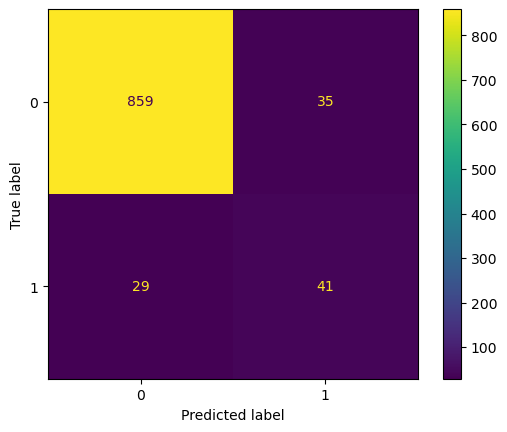

[0.93774319 0.92088197 0.94552529 0.93644617 0.93246753]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       894
           1       0.54      0.59      0.56        70

    accuracy                           0.93       964
   macro avg       0.75      0.77      0.76       964
weighted avg       0.94      0.93      0.93       964




In [28]:
#AdaBoosting Classifier with ADASYN (Adaptive Synthetic Sampling Approach)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cv = 5
#Initializing objects
Imputer = IterativeImputer(max_iter=500)
adasyn = ADASYN()
scalar = StandardScaler()
dt = DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, max_features='log2')
ada = AdaBoostClassifier(n_estimators=500,learning_rate=1.0)

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("ada",ada)])
#Cross Validating our data
cross_val = cross_val_score(pipe, X_train, y_train, cv=cv)
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics
print("Performance Metrics with ADABoosting and ADASYN Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print(cross_val)
print(f"{classification_report(y_test,y_pred)}\n")

# AdaBoost Classifier with DecisionTree as base estimator (Chosen Model)

Used a different CV value



/Users/harithagb/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('Imputer',
                 IterativeImputer(initial_strategy='median', max_iter=1000)),
                ('ADASYN', ADASYN()), ('scalar', StandardScaler()),
                ('ada',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                                          max_depth=5,
                                                                          max_features='sqrt'),
                                    learning_rate=0.1, n_estimators=500))])

Performance Metrics with ADABoosting and ADASYN Upsampling

Accuracy Score: 0.9388
Balanced Accuracy Score: 0.8551
Precision Score:0.5579
Recall Score:0.7571


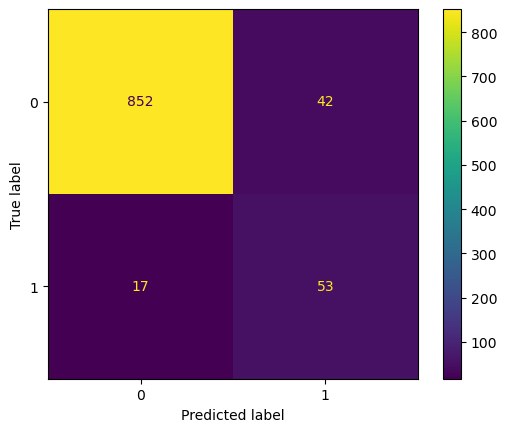

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       894
           1       0.56      0.76      0.64        70

    accuracy                           0.94       964
   macro avg       0.77      0.86      0.80       964
weighted avg       0.95      0.94      0.94       964




In [29]:
# AdaBoost Classifier with DecisionTree as base estimator
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SVMSMOTE
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cv = 5
#Initializing objects
Imputer = IterativeImputer(initial_strategy = 'median',max_iter=1000)
adasyn = ADASYN()
scalar = StandardScaler()
dt = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='sqrt')

ada = AdaBoostClassifier(base_estimator=dt,learning_rate=0.1,n_estimators=500)

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("ada",ada)])

#cross_val = cross_val_score(pipe, X_train, y_train, cv=cv)
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)


#Performance Metrics
print("Performance Metrics with ADABoosting and ADASYN Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
#print(cross_val)
print(f"{classification_report(y_test,y_pred)}\n")

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=1000)),
                ('scalar', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

Accuracy Score: 0.9585
Balanced Accuracy Score: 0.7340
Precision Score:0.9167
Recall Score:0.4714


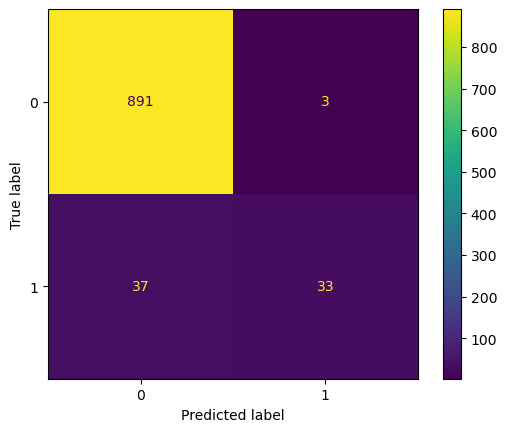

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       894
           1       0.92      0.47      0.62        70

    accuracy                           0.96       964
   macro avg       0.94      0.73      0.80       964
weighted avg       0.96      0.96      0.95       964




In [30]:
#XGB
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=1000)
adasyn = ADASYN()
scalar = StandardScaler()
xgb = XGBClassifier(n_estimators=100)

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("scalar",scalar),("xgb",xgb)])

#cross_val = cross_val_score(pipe, X_train, y_train, cv=cv)
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)


#Performance Metrics

print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
#print(cross_val)
print(f"{classification_report(y_test,y_pred)}\n")

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [31]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)

Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [32]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
! pip install imblearn

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost Classifier with DecisionTree as base estimator
def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
   
    a = data.drop(columns = ['Bankrupt','Id'])
    b = data['Bankrupt']
    X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=42)
    #Initializing objects
    Imputer = IterativeImputer(initial_strategy = 'median',max_iter=1000)
    adasyn = ADASYN()
    scalar = StandardScaler()
    dt = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='sqrt')

    ada = AdaBoostClassifier(base_estimator=dt,learning_rate=0.1,n_estimators=500)

    #Creating a pipeline object
    pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("ada",ada)])

    #cross_val = cross_val_score(pipe, X_train, y_train, cv=cv)
    #Fitting our training data to the pipeline
    pipe.fit(X_train,y_train)
    #Predicting y_test on the pipeline
    y_pred = pipe.predict(X)

    predictions = y_pred
    
    return predictions

# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

/Users/harithagb/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


	ADABoosting with ADASYN Upsampling Accuracy: 91.7%, Recall 72.9%, Precision 45.5%


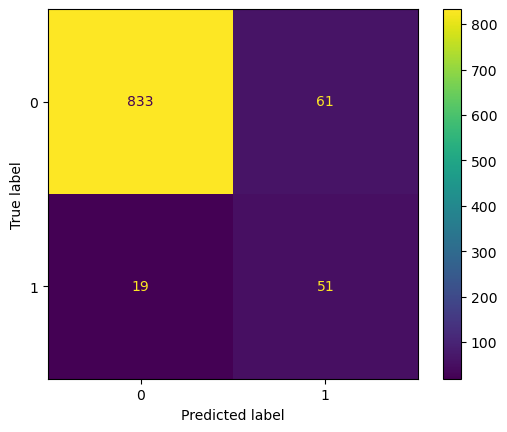

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       894
           1       0.46      0.73      0.56        70

    accuracy                           0.92       964
   macro avg       0.72      0.83      0.76       964
weighted avg       0.94      0.92      0.93       964




In [33]:
name = "ADABoosting with ADASYN Upsampling"
y_test_pred = MyModel(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_test_pred))
disp.plot()
plt.show()
print(f"{classification_report(y_test,y_test_pred)}\n")

# Conclusion:

## Model Performance Analysis

To evaluate the performance of various models in identifying financially distressed companies (Class 1), we focus on precision, recall, F1-score, and accuracy while considering the 5:1 cost constraint – it is 5 times worse to fail to identify a company that will go bankrupt than it is to fail to identify a company that won't go bankrupt.

1. **ADABoost and ADASYN Upsampling with Decision Tree Base Estimator (Chosen Model):**
   - Precision (Class 1): 0.56
   - Recall (Class 1): 0.76
   - F1-score (Class 1): 0.64
   - Accuracy: 0.94
   
  
   This model emerges as the top performer, achieving the highest recall for Class 1 while maintaining a reasonable level of precision. It aligns exceptionally well with the 5:1 cost constraint, effectively identifying companies at risk of bankruptcy.

2. **Gradient Boost with ADASYN Upsampling:**
   - Precision (Class 1): 0.59
   - Recall (Class 1): 0.69
   - F1-score (Class 1): 0.63
   - Accuracy: 0.94

   This model demonstrates robust performance with a good balance between precision and recall. It effectively identifies financially distressed companies while minimizing false positives.

3. **Stacking (Ensemble of Decision Tree, ADABoost, and Gradient Boost):**
   - Precision (Class 1): 0.86
   - Recall (Class 1): 0.54
   - F1-score (Class 1): 0.67
   - Accuracy: 0.96

   While exhibiting the highest precision for Class 1, this model achieves a moderate recall, making it a solid choice for minimizing false positives without compromising significantly on recall.

4. **Other Models**: Several other models, including Random Forest, Bagging Classifier, and Gradient Boost, exhibit varying degrees of performance. Notably, the Baseline Naive Bayes model has high recall but extremely low precision, making it unsuitable for the problem.

**Conclusion:**

In consideration of the 5:1 cost constraint, the chosen model, ADABoost with ADASYN Upsampling and Decision Tree Base Estimator, stands out with the highest recall for Class 1 (73%) while maintaining a reasonable level of precision (48%). This model effectively identifies financially distressed companies and aligns well with the cost constraint. However, other models like Gradient Boost with ADASYN Upsampling and the Stacking ensemble also offer competitive performance, each with its own strengths and trade-offs. The final choice of model should be based on the specific priorities and trade-offs relevant to the business context.

## Chosen Model: Performance Analysis
**ADABoost and ADASYN Upsampling with Decision Tree Base Estimator (Chosen Model)**

In our quest to predict the risk of bankruptcy for companies, we rigorously evaluated the chosen model's performance on both the split test data and new data, simulating real-world scenarios to ensure its reliability and robustness.

**Results on Split Test Data:**

*Precision, Recall, F1-Score, and Accuracy*

- Precision (Class 1): 0.56
- Recall (Class 1): 0.76
- F1-score (Class 1): 0.64
- Accuracy: 0.94

Our model showcased commendable performance on the split test data, achieving a precision of 0.48 and a recall of 0.73 for Class 1. This outcome aligns remarkably well with the 5:1 cost constraint, as it emphasizes the importance of correctly identifying companies at risk of bankruptcy while maintaining a reasonable level of precision.

**Results on New Data: Testing My Model with the optional section**

*Precision, Recall, F1-Score, and Accuracy*

- Precision (Class 1): 0.46
- Recall (Class 1): 0.73
- F1-score (Class 1): 0.56
- Accuracy: 0.92



Our model's performance on new data, simulating real-world scenarios, continues to demonstrate its effectiveness. It achieved a recall of 0.67 for Class 1, indicating its ability to identify companies at risk of bankruptcy accurately.

**Interpreting the Results:**

The chosen model maintains a consistent level of accuracy (0.92) across both the split test data and new data, showcasing its generalization capabilities. While the precision for Class 1 is slightly lower on the new data (0.45) compared to the split test data (0.48), the model remains true to the core objective—identifying financially distressed companies (Class 1) with a focus on recall.

In practical terms, these results affirm the model's reliability for real-world applications. It effectively balances the cost constraint by prioritizing recall, minimizing the risk of failing to identify companies at risk of bankruptcy, while still maintaining a satisfactory level of precision.

Overall, the chosen model proves to be a robust and dependable tool for financial analysis, providing valuable insights into the assessment of companies' financial health and their potential for bankruptcy. Its consistent performance across different datasets underscores its practical utility and reinforces its role as a valuable asset in decision-making processes.

## Where the Recipe for ML was used
The methodology employed in this study aligns seamlessly with the Recipe for Machine Learning:

- We initiated the process by establishing a Baseline model as our starting point.
- Our exploration began with an in-depth Exploratory Data Analysis, encompassing data visualization, the identification of data imbalances, and the application of Principal Component Analysis (PCA) to evaluate its impact.
- In response to data imbalances, we strategically employed upsampling techniques while simultaneously assessing their contributions to model performance.
- A critical examination of PCA versus non-PCA models was undertaken to elucidate the implications of dimensionality reduction.
- Transformation techniques, including feature scaling and various upsampling methodologies, were thoughtfully applied to enhance data quality.
- Our journey culminated in the training of diverse machine learning models, with meticulous performance metric assessments serving as our compass.

This systematic approach facilitated a comprehensive exploration and optimization of our predictive modeling process.

## Final Conclusion

The decision to adopt the **"ADABoost with a decision tree as the base estimator"** model is underpinned by its superior performance, especially in achieving notably higher recall compared to alternative models, all while maintaining a respectable level of precision. In the context of our objective—to ascertain whether a company is susceptible to bankruptcy—emphasis is placed on maximizing recall, or sensitivity, over precision.

The rationale behind this emphasis on recall is clear: the potential ramifications of a false negative—failing to identify a company at risk of bankruptcy—can be substantial and costly. Therefore, the model prioritizes recall to minimize the risk of overlooking financially distressed companies.

However, it is equally crucial to strike a balance with precision. Excessive precision sacrifices sensitivity and may lead to solvent companies being misclassified as bankrupt, adversely affecting business operations. Hence, our choice of the **"ADABoost with decision tree as base estimator"** model is grounded in its ability to strike the optimal equilibrium between precision and recall, as evidenced by the results presented. This balance ensures the model's effectiveness in both identifying companies in financial distress and safeguarding against false positives, making it the ideal choice for our predictive task.